Abstract:
Iris recognition technology is based on the identification of the iris in the eye. Human eye structure consists of sclera, iris, pupil lens, retina and other parts. The iris is an annular portion between the black pupil and the white sclera, which contains many detailed features of staggered spots, filaments, stripes, crypts, and the like. Moreover, after the formation of the fetus, the iris will remain unchanged throughout the life course. These characteristics determine the uniqueness of the iris features and also determine the uniqueness of the identification. Therefore, the iris feature of the eye can be used as an identification object for each person. This paper proposed iris segmentation based on iris classification, the accuracy of iris segmentation depends on the accuracy of classification. So as to verify the SVM can get higher accuracy of iris classification than other three methods LDA, KNN and NB, the fourth experiment was carried out about race classification (Asian and White). 

Introduction:
Iris recognition technology is a kind of human biological recognition technology. The appearance of the human eye consists of three parts: the sclera, the iris, and the pupil. The sclera, which is the white part of the eyeball, accounts for about 30% of the total area; the center of the eye is the pupil, which accounts for about 5%; the iris is located between the sclera and the pupil and contains the most abundant texture information, occupying 65%. From the appearance, it is composed of many glands, folds, pigment spots, etc. It is one of the most unique structures in the human body. The formation of the iris is determined by genetics, and the human gene expression determines the morphology, physiology, color and overall appearance of the iris. After about eight months of development, the iris has basically developed to a sufficient size and entered a relatively stable period. Unless unusual abnormalities, physical or mental trauma, may cause changes in the appearance of the iris, the morphology of the iris can remain unchanged for decades. On the other hand, the iris is visible to the outside but at the same time belongs to the internal tissue behind the cornea. To change the appearance of the iris, very delicate surgery is required and the risk of visual impairment is risked. The uniqueness, stability and immutability of the iris are the material basis for the identification of the iris. 

KNN
k-nearest neighbors algorithm is a non-parametric method used for classification and regression. In K-NN algorithms there are brute, kd_tree and ball_tree. In this research, the algorithms used is kd_tree. The k-d tree is a binary tree in which every node is a k-dimensional point.

In [45]:
from numpy import * 
import numpy as np

import scipy.io as scio
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import cross_validation
from matplotlib import colors
import h5py as h5
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.cross_validation import StratifiedKFold
from sklearn import neighbors as ng
from sklearn.svm import SVC 

create a function to get train dataset and test dataset

In [46]:
def getTrainAndTestSetRace(path,trainNum, dataName):
	'get trainset and testset'
	Data = h5.File(path)
	All = Data[dataName] #
	All = np.array(All)
	All = All.T

	Features = All[0:shape(All)[0],:] #384x1
	
	#get the last col of matrix,-1 is the last one  shape(lgbpLionsAll)[0] to get the row,shape(lgbpLionsAll)[1] to get the col
	#lgbpLionsName = lgbpLionsAll[0:shape(lgbpLionsAll)[0],-1:shape(lgbpLionsAll)[1]]
	#lions train 
	trainSet = Features[0:trainNum,:] #200x1

	#lion test
	testSet = Features[trainNum:shape(All)[0],:] #183x1
	#lionsTestSetName = lgbpLionsName[trainNum+1:shape(lgbpLionsAll)[0],:]
	return trainSet,testSet

create a function to use the KNN model to make classification

In [47]:
def KNNClassificationForIris(trainNum, _type, *dataSet):
	'This function is for KNN classification'
	print('kkkkkkkkkkkkkkkkkkkkkkkk')
	#print(dataSet[0])
	trainSet = np.concatenate((dataSet[0],dataSet[2]),axis=0) #lion + all human

	trainLabelOne = np.zeros((shape(dataSet[0])[0],1)) #first class label for lions
	trainLabelTwo = np.ones((shape(dataSet[2])[0],1)) #second class label for all human
	trainLabel = np.concatenate((trainLabelOne,trainLabelTwo),axis=0)

	testLabelOne = np.zeros((shape(dataSet[1])[0],1))
	testLabelTwo = np.ones((shape(dataSet[3])[0],1))
	testLabel = np.concatenate((testLabelOne, testLabelTwo),axis=0)
	#print (shape(testLabel)) #417x1
	testSetOne = np.array(dataSet[1])
	testSetTwo = np.array(dataSet[3])
	testSet = np.concatenate((testSetOne,testSetTwo),axis=0) #testSet : 417x2360
#	print ('++++++++++++++++++++')
#	print (shape(trainSet))
#	print (shape(trainLabel))
	print ('------------------------------')
	#print (trainSet.shape)
	#print (trainLabel.shape)
	clf = ng.KNeighborsClassifier(algorithm='kd_tree')
	clf.fit(trainSet, trainLabel)
#	SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,\
#		decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',\
#		max_iter=-1, probability=False, random_state=None, shrinking=True,\
#		tol=0.001, verbose=False)
	
	print ('=========================The classification results are :=======================')
	classificationResult = clf.predict(testSet)
	#store the classification result: known class,unknown class
	#print(testLabel.shape), print(classificationResult.shape)
	#classificationResult.shape=(testLabel.shape[0],1)
	#print(testLabel.shape), print(classificationResult.shape)
	origin_class = testLabel
	clf_class = classificationResult
	clf_class.shape = (testLabel.shape[0],1)
	all_class = np.concatenate((origin_class, clf_class), axis=1)
	print('---------------number of test set--------------')
	print(all_class.shape[0])
	#label_name = _type + '_SVM_ORIGIN_CLF_LABEL.csv'
	#np.savetxt(label_name, all_class, delimiter = ',')  
	print ('=========the classfiy results==============') #1x417; 
	print (classificationResult)

	#save the classificationResult: the first column is true label, the second is classification label
	#testLabel.T: transposition转置; testLabel为1x417,classificationResult为417x1,dimensionality is different, so need to convert to the same维数不同,需要化为相同
	
	trueLabelAndClassifyLabel = np.concatenate((testLabel,classificationResult),axis=0)
	trueLabelAndClassifyLabel = trueLabelAndClassifyLabel.T
	#print (trueLabelAndClassifyLabel.shape)
	count = 0
	wrong_num = 0
	for i in range(1,shape(classificationResult)[0]):
		if testLabel[i] == classificationResult[i]:
			count = count + 1
		else:
			wrong_num += 1
			print('=============the wrong num is ' + str(i))
	print('Total number of inaccurate images is' + str(wrong_num) )
	accurcay = count/classificationResult.shape[0]
	print ('======================The accurcay of KNN:==========================================')
	print (accurcay)

	print ('======================The scores:===============================================')
	weight = [0.0001 for i in range(classificationResult.shape[0])]
	for x in range(1,classificationResult.shape[0]):
		weight[x-1] = random.uniform(0,1)
	print(clf.score(testSet, testLabel,weight))

	#print ('======================The Estimate probability=================================')
	#estimate_pro = clf.predict_proba(testSet) # for get ROC
	#print (estimate_pro)
	#print (estimate_pro.shape)

	#print ('======================Predicit confidence scores for samples:============================')
	#predicit_confidence = clf.decision_function(testSet)
	#print (predicit_confidence)
	#print (predicit_confidence.shape)
	#call ROC
	#yLabel = np.concatenate((trainLabel,testLabel),axis=0)
	#getROCCurve(testLabel, predicit_confidence)
	#cross validation
	X = np.concatenate((trainSet,testSet),axis=0)
	Y = np.concatenate((trainLabel,testLabel),axis=0)
	YY = Y
	YY.shape = (YY.shape[0],)
	#kFold = cross_validation.KFold(len(X),6, shuffle=True)
	kFold = StratifiedKFold(YY, n_folds=6)
	
	acc_y = getROCCurve(clf,X, Y, kFold, _type)
	print ('======================The terminal acc_y of KNN:==========================================')
	print(acc_y)
	#return acc_y #for CCR
	return accurcay

create a function to set train number and call the KNNClassificationForIris function

In [48]:
def lgbpForIrisKNN(lion_path, human_path,trainNum, _type, lion_type, huamn_type):
	
	trainNum = 10000
	lgbpLions = lion_path#'../../big_data_feature_extraction/LGBP/matrixLGBP/LGBPRotateLions/LGBPRotateLionsFeature.mat'
	lgbpHuman = human_path#'../../big_data_feature_extraction/LGBP/matrixLGBP/LGBPThousand/LGBPThousandFeature.mat'
	#lgbpHumanGlass = '../../feature_extraction/matrixLGBP/LGBPHumanGlass.mat'
	#label
	lionLabel = 0;
	humanLabel = 1;
	#humanGlassLabel = 1;
	#print(shape(lgbpLions))
	#for lions
	(lionsTrainSet,lionsTestSet) = getTrainAndTestSet(lgbpLions,trainNum,'LGBPData',lion_type, huamn_type)
	print('=====================================================================')
	print(shape(lionsTrainSet))
	print(type(lionsTrainSet))


	#for human 
	(humanTrainSet,humanTestSet) = getTrainAndTestSet(lgbpHuman,trainNum,'LGBPData',lion_type, huamn_type)
	#shape(lionsTrainSet)
	#for humanglass
	#(humanGlassTrainSet,humanGlassTestSet) = getTrainAndTestSet(lgbpHumanGlass,trainNum,'LGBPHumanGlass')
	#print (type(humanGlassTrainSet))
	#print (shape(humanGlassTrainSet))
	accurcay = KNNClassificationForIris(trainNum,_type, lionsTrainSet,lionsTestSet, \
		humanTrainSet, humanTestSet)
	return accurcay



create a function to get train and test set for asian and white

In [49]:
def forRaceKNN(asian_path,  white_path,train_num, _type, file_type):
	
	(AsianTrainSet,AsianTestSet) = getTrainAndTestSetRace(asian_path,train_num, _type+'AsianTrain')
	(WhiteTrainSet,WhiteTestSet) = getTrainAndTestSetRace(white_path,train_num, _type+'WhiteTrain')

	acc_y = KNNClassificationForIris(train_num,file_type, AsianTrainSet,AsianTestSet, \
		WhiteTrainSet, WhiteTestSet)
	return acc_y

create a function to get the ROC curve

In [50]:
def getROCCurve(clf, X, Y, kFold, _type):
	print ('====================================get ROC ====================')
	#cross validation
	mean_tpr = 0.0
	mean_fpr = np.linspace(0,1,100)
	#the accuracy
	acc_y = []
	for i, (trn,tst) in enumerate(kFold):
		#print (tst)
		proBas = clf.fit(X[trn], Y[trn]).predict_proba(X[tst])
		#through the roc_curve() to get the value of fpr,tpr and threshold value
		fpr,tpr,thresholds = roc_curve(Y[tst], proBas[:,1])
		mean_tpr += interp(mean_fpr,fpr,tpr)
		mean_tpr[0] = 0.0
		roc_auc = auc(fpr,tpr)
		plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
		outVal = clf.score(X[tst], Y[tst])
		acc_y.append(outVal)
		#print (outVal)
	#	plt.plot(fpr, tpr, lw=1, label='ROC')
	#acc_y = np.mean(acc_y)
	print('========each acc_y===========--------------------')
	print(acc_y)
	plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
	#plt.plot(fpr, tpr, lw=1, color='#FF0000', label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

	mean_tpr /= len(kFold)
	mean_tpr[-1] = 1.0 						#（1,1）
	mean_auc = auc(mean_fpr, mean_tpr)		#calculate the mean AUC value
	#plot the mean ROC curve
	#print mean_fpr,len(mean_fpr)
	print('------------fpr, tpr-----------------')
	mean_fpr1 = mean_fpr
	mean_fpr1.shape = (mean_fpr.shape[0],1)
	#print(mean_fpr1.shape)
	mean_tpr1 = mean_tpr
	mean_tpr1.shape = (mean_tpr.shape[0],1)
	#print(mean_tpr1.shape)
	fpr_tpr = np.concatenate((mean_fpr1,mean_tpr1),axis=1)
	#roc_data_name = _type + '_FPR_TPR.csv'
	#np.savetxt(roc_data_name, fpr_tpr, delimiter = ',')
	#print(mean_fpr.shape)
	#print(mean_tpr.shape)
	#for EER
	for i in range(mean_fpr.shape[0]):
		if mean_fpr[i] == mean_tpr[i]:
			eer = mean_fpr[i]
			break;
	print('--------------------eer------------' )
	print(eer)

	plt.plot(mean_fpr, mean_tpr,  '--',color='#0000FF',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=1)
	plt.xlim([-0.02, 1.02])
	plt.ylim([-0.02, 1.02])
	plt.xlabel('False Positive Rate')
	plt.ylabel('True Positive Rate')
	plt.title('Receiver operating characteristic example')
	plt.legend(loc="lower right")
	plt.show()
	return np.mean(acc_y)

++++++++++++++++ test set number is:100+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


---------------number of test set--------------
2200
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]
=============the wrong num is 8
=============the wrong num is 11
=============the wrong num is 20
=============the wrong num is 30
=============the wrong num is 32
=============the wrong num is 33
=============the wrong num is 40
=============the wrong num is 41
=============the wrong num is 43
=============the wrong num is 49
=============the wrong num is 50
=============the wrong num is 51
=============the wrong num is 70
=============the wrong num is 72
=============the wrong num is 75
=============the wrong num is 80
=============the wrong num is 85
=============the wrong num is 86
=============the wrong num is 115
=============the wrong num is 116
=============the wrong num is 117
=============the wrong num is 118
=============the wrong num is 119
=============the wrong num is 121
=============the wrong num is 122
=============the wrong num is 

0.77179159776639
====================================get ROC ====================
========each acc_y===========--------------------
[0.9925, 0.9925, 0.9875, 0.9975, 0.985, 0.9825]
------------fpr, tpr-----------------
--------------------eer------------
[0.]


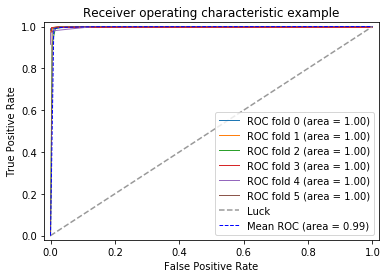

======================The terminal acc_y of KNN:==========================================
0.9895833333333334
==============accurcay:
0.7786363636363637
++++++++++++++++ test set number is:200+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
2000
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
=============the wrong num is 15
=============the wrong num is 19
=============the wrong num is 62
=============the wrong num is 71
=============the wrong num is 73
=============the wrong num is 74
=============the wrong num is 221
=============the wrong num is 235
=============the wrong num is 313
=============the wrong num is 626
=============the wrong num is 633
=============the wrong num is 641
=============the wrong num is 646
=============the wrong num is 696
=============the wrong num is 703
====

0.8278736581091583
====================================get ROC ====================
========each acc_y===========--------------------
[0.9925, 0.9925, 0.9875, 0.9975, 0.985, 0.9825]
------------fpr, tpr-----------------
--------------------eer------------
[0.]


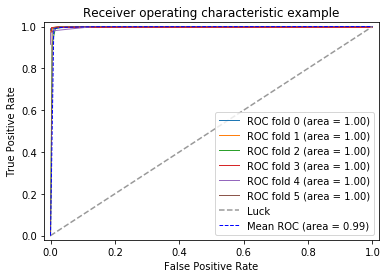

======================The terminal acc_y of KNN:==========================================
0.9895833333333334
==============accurcay:
0.832
++++++++++++++++ test set number is:300+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
1800
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
=============the wrong num is 39
=============the wrong num is 121
=============the wrong num is 135
=============the wrong num is 213
=============the wrong num is 316
=============the wrong num is 684
=============the wrong num is 692
=============the wrong num is 696
=============the wrong num is 697
=============the wrong num is 724
=============the wrong num is 904
=============the wrong num is 910
=============the wrong num is 911
=============the wrong num is 915
=============the wrong num is 918
============

0.830822793296882
====================================get ROC ====================
========each acc_y===========--------------------
[0.9925, 0.9925, 0.9875, 0.9975, 0.985, 0.9825]
------------fpr, tpr-----------------
--------------------eer------------
[0.]


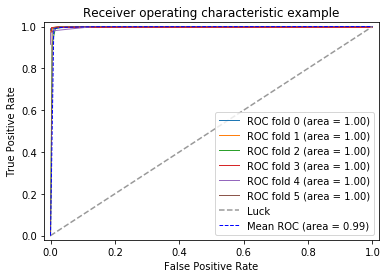

======================The terminal acc_y of KNN:==========================================
0.9895833333333334
==============accurcay:
0.8355555555555556
++++++++++++++++ test set number is:400+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
1600
=========the classfiy results==============
[[0.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
=============the wrong num is 1
=============the wrong num is 11
=============the wrong num is 21
=============the wrong num is 35
=============the wrong num is 75
=============the wrong num is 89
=============the wrong num is 113
=============the wrong num is 215
=============the wrong num is 216
=============the wrong num is 393
=============the wrong num is 501
=============the wrong num is 624
=============the wrong num is 673
=============the wrong num is 727
=============the wrong num is 785
=====

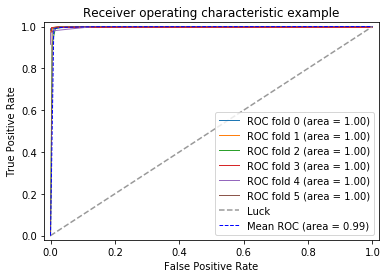

======================The terminal acc_y of KNN:==========================================
0.9895833333333334
==============accurcay:
0.9025
++++++++++++++++ test set number is:500+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
1400
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
=============the wrong num is 13
=============the wrong num is 115
=============the wrong num is 116
=============the wrong num is 293
=============the wrong num is 401
=============the wrong num is 524
=============the wrong num is 709
=============the wrong num is 1120
=============the wrong num is 1176
=============the wrong num is 1182
=============the wrong num is 1234
=============the wrong num is 1299
=============the wrong num is 1325
=============the wrong num is 1384
=============the wrong num is 1385
===

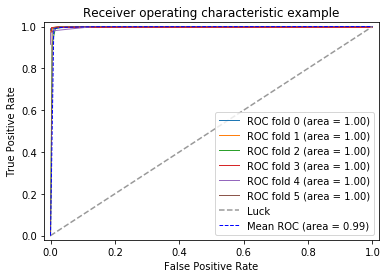

======================The terminal acc_y of KNN:==========================================
0.9895833333333334
==============accurcay:
0.9878571428571429
++++++++++++++++ test set number is:600+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
1200
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
=============the wrong num is 15
=============the wrong num is 16
=============the wrong num is 301
=============the wrong num is 424
=============the wrong num is 920
=============the wrong num is 976
=============the wrong num is 982
=============the wrong num is 1034
=============the wrong num is 1125
=============the wrong num is 1184
=============the wrong num is 1185
=============the wrong num is 1187
Total number of inaccurate images12
======================The accurcay of KNN:===================

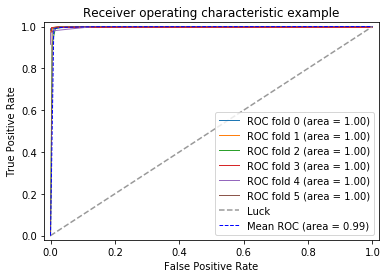

======================The terminal acc_y of KNN:==========================================
0.9895833333333334
==============accurcay:
0.9891666666666666
++++++++++++++++ test set number is:700+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
1000
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

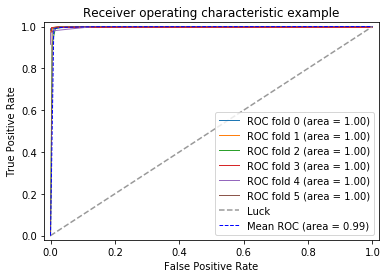

======================The terminal acc_y of KNN:==========================================
0.9895833333333334
==============accurcay:
0.988
=====ccr=====
[0.7786363636363637, 0.832, 0.8355555555555556, 0.9025, 0.9878571428571429, 0.9891666666666666, 0.988]


In [51]:
if __name__ == "__main__":

	loop_num=np.array([100,1000,2000,4000,6000,8000,10000])
	acc=[]
	loop_num1=np.array([100,200,300,400,500,600,700])
	#LGBP
	for i in range(len(loop_num1)):
		print ('++++++++++++++++ test set number is:' + str(loop_num1[i])+ '+++++++++++++++++++++++')
		lgbp_asian_path = 'LGBPAsian.mat'
		lgbp_white_path = 'LGBPWhite.mat'
		trainNum = loop_num1[i]
		accurcay = forRaceKNN(lgbp_asian_path,lgbp_white_path, trainNum,'LGBP','LGBP_Asian_White')
		print('==============accurcay:')
		print(accurcay)
		acc.append(accurcay)
	np.savetxt('LGBP_RACE_CCR_KNN.csv', acc, delimiter = ',')  

	print('=====ccr=====') #train set 10000 stands for getting 10000 from each class to train
	print(acc)
	plt.plot(loop_num1*2,acc, 'r--*')
	plt.xlabel('Number of iris images userd for training per each class')
	plt.ylabel('Correct Classification Rate')

NB
In machine learning, naive Bayes classifiers are a family of simple "probabilistic classifiers "based on applying Bayes' theorem with strong (naive) independence assumptions between the features. In this research, the NB algorithms used is Gaussian naive Bayes.

create a function to use GaussianNB

In [52]:
def NBClassificationForIris(trainNum, _type, *dataSet):
	'This function is for NB classification'
	print('kkkkkkkkkkkkkkkkkkkkkkkk')
	#print(dataSet[0])
	
	
	
	trainSet = np.concatenate((dataSet[0],dataSet[2]),axis=0) #lion + all human

	trainLabelOne = np.zeros((shape(dataSet[0])[0],1)) #first class label for lions
	trainLabelTwo = np.ones((shape(dataSet[2])[0],1)) #second class label for all human
	trainLabel = np.concatenate((trainLabelOne,trainLabelTwo),axis=0)

	testLabelOne = np.zeros((shape(dataSet[1])[0],1))
	testLabelTwo = np.ones((shape(dataSet[3])[0],1))
	testLabel = np.concatenate((testLabelOne, testLabelTwo),axis=0)
	#print (shape(testLabel)) #417x1
	testSetOne = np.array(dataSet[1])
	testSetTwo = np.array(dataSet[3])
	testSet = np.concatenate((testSetOne,testSetTwo),axis=0) #testSet : 417x2360
#	print ('++++++++++++++++++++')
#	print (shape(trainSet))
#	print (shape(trainLabel))
	print ('------------------------------')
	#print (trainSet.shape)
	#print (trainLabel.shape)
	clf = GaussianNB()
	clf.partial_fit(trainSet, trainLabel,np.unique(trainLabel))
	GaussianNB(priors=None)
#	SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,\
#		decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',\
#		max_iter=-1, probability=False, random_state=None, shrinking=True,\
#		tol=0.001, verbose=False)
	
	print ('=========================The classification results are :=======================')
	classificationResult = clf.predict(testSet)
	#store the classification result: known class,unknown class
	#print(testLabel.shape), print(classificationResult.shape)
	#classificationResult.shape=(testLabel.shape[0],1)
	#print(testLabel.shape), print(classificationResult.shape)
	origin_class = testLabel
	clf_class = classificationResult
	clf_class.shape = (testLabel.shape[0],1)
	all_class = np.concatenate((origin_class, clf_class), axis=1)
	print('---------------number of test set--------------')
	print(all_class.shape[0])
	#label_name = _type + '_SVM_ORIGIN_CLF_LABEL.csv'
	#np.savetxt(label_name, all_class, delimiter = ',')  
	print ('=========the classfiy results==============') #1x417; 
	print (classificationResult)

	#save the classificationResult: the first column is true label, the second is classification label
	#testLabel.T: transposition转置; testLabel为1x417,classificationResult为417x1,dimensionality is different, so need to convert to the same维数不同,需要化为相同
	
	trueLabelAndClassifyLabel = np.concatenate((testLabel,classificationResult),axis=0)
	trueLabelAndClassifyLabel = trueLabelAndClassifyLabel.T
	#print (trueLabelAndClassifyLabel.shape)
	count = 0
	wrong_num = 0
	for i in range(1,shape(classificationResult)[0]):
		if testLabel[i] == classificationResult[i]:
			count = count + 1
		else:
			wrong_num += 1
			print('=============the wrong num is ' + str(i))
	print('Total number of inaccurate images is ' + str(wrong_num) )
	accurcay = count/classificationResult.shape[0]
	print ('======================The accurcay of LDA:==========================================')
	print (accurcay)

	print ('======================The scores:===============================================')
	weight = [0.0001 for i in range(classificationResult.shape[0])]
	for x in range(1,classificationResult.shape[0]):
		weight[x-1] = random.uniform(0,1)
	print(clf.score(testSet, testLabel,weight))

	#print ('======================The Estimate probability=================================')
	#estimate_pro = clf.predict_proba(testSet) # for get ROC
	#print (estimate_pro)
	#print (estimate_pro.shape)

	#print ('======================Predicit confidence scores for samples:============================')
	#predicit_confidence = clf.decision_function(testSet)
	#print (predicit_confidence)
	#print (predicit_confidence.shape)
	#call ROC
	#yLabel = np.concatenate((trainLabel,testLabel),axis=0)
	#getROCCurve(testLabel, predicit_confidence)
	#cross validation
	X = np.concatenate((trainSet,testSet),axis=0)
	Y = np.concatenate((trainLabel,testLabel),axis=0)
	YY = Y
	YY.shape = (YY.shape[0],)
	#kFold = cross_validation.KFold(len(X),6, shuffle=True)
	kFold = StratifiedKFold(YY, n_folds=6)
	
	acc_y = getROCCurve(clf,X, Y, kFold, _type)
	print ('======================The terminal acc_y of NB:==========================================')
	print(acc_y)
	#return acc_y #for CCR
	return accurcay





In [55]:
def forRaceNB(asian_path,  white_path,train_num, _type, file_type):
	
	(AsianTrainSet,AsianTestSet) = getTrainAndTestSetRace(asian_path,train_num, _type+'AsianTrain')
	(WhiteTrainSet,WhiteTestSet) = getTrainAndTestSetRace(white_path,train_num, _type+'WhiteTrain')

	acc_y = NBClassificationForIris(train_num,file_type, AsianTrainSet,AsianTestSet, \
		WhiteTrainSet, WhiteTestSet)
	return acc_y

++++++++++++++++ test set number is:100+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------number of test set--------------
2200
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]
=============the wrong num is 29
=============the wrong num is 30
=============the wrong num is 31
=============the wrong num is 32
=============the wrong num is 33
=============the wrong num is 36
=============the wrong num is 74
=============the wrong num is 133
=============the wrong num is 175
=============the wrong num is 179
=============the wrong num is 180
=============the wrong num is 181
=============the wrong num is 187
=============the wrong num is 321
=============the wrong num is 335
=============the wrong num is 406
=============the wrong num is 410
=============the wrong num is 412
=============the wrong num is 413
=============the wrong num is 416
=============the wrong num is 420
=============the wrong num is 424
=============the wrong num is 432
=============the wrong num is 434
=============the wrong num is 441
=============the w

=============the wrong num is 1852
=============the wrong num is 1853
=============the wrong num is 1854
=============the wrong num is 1855
=============the wrong num is 1856
=============the wrong num is 1857
=============the wrong num is 1858
=============the wrong num is 1872
=============the wrong num is 1873
=============the wrong num is 1874
=============the wrong num is 1875
=============the wrong num is 1913
=============the wrong num is 1914
=============the wrong num is 1915
=============the wrong num is 1916
=============the wrong num is 1917
=============the wrong num is 1918
=============the wrong num is 1919
=============the wrong num is 1920
=============the wrong num is 1921
=============the wrong num is 1923
=============the wrong num is 1924
=============the wrong num is 1925
=============the wrong num is 1926
=============the wrong num is 1927
=============the wrong num is 1928
=============the wrong num is 1929
=============the wrong num is 1930
=============the wro

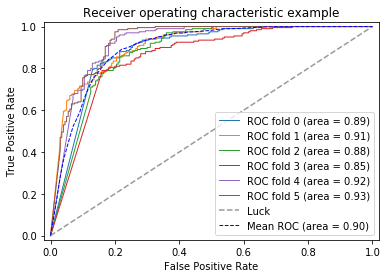

======================The terminal acc_y of NB:==========================================
0.7879166666666667
==============accurcay:
0.7645454545454545
++++++++++++++++ test set number is:200+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
2000
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]
=============the wrong num is 32
=============the wrong num is 33
=============the wrong num is 75
=============the wrong num is 79
=============the wrong num is 80
=============the wrong num is 81
=============the wrong num is 87
=============the wrong num is 221
=============the wrong num is 235
=============the wrong num is 306
=============the wrong num is 310
=============the wrong num is 311
=============the wrong num is 312
=============the wrong num is 313
=============the wrong num is 316
======

=============the wrong num is 1616
=============the wrong num is 1635
=============the wrong num is 1637
=============the wrong num is 1639
=============the wrong num is 1640
=============the wrong num is 1641
=============the wrong num is 1642
=============the wrong num is 1643
=============the wrong num is 1644
=============the wrong num is 1645
=============the wrong num is 1646
=============the wrong num is 1647
=============the wrong num is 1648
=============the wrong num is 1649
=============the wrong num is 1650
=============the wrong num is 1651
=============the wrong num is 1652
=============the wrong num is 1653
=============the wrong num is 1654
=============the wrong num is 1655
=============the wrong num is 1656
=============the wrong num is 1657
=============the wrong num is 1658
=============the wrong num is 1673
=============the wrong num is 1674
=============the wrong num is 1713
=============the wrong num is 1714
=============the wrong num is 1715
=============the wro

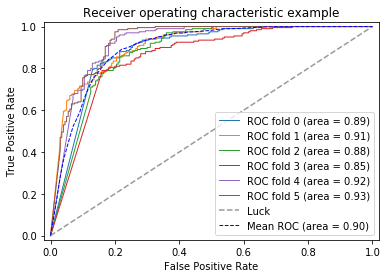

======================The terminal acc_y of NB:==========================================
0.7879166666666667
==============accurcay:
0.758
++++++++++++++++ test set number is:300+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
1800
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]
=============the wrong num is 85
=============the wrong num is 89
=============the wrong num is 121
=============the wrong num is 124
=============the wrong num is 135
=============the wrong num is 206
=============the wrong num is 210
=============the wrong num is 211
=============the wrong num is 212
=============the wrong num is 213
=============the wrong num is 216
=============the wrong num is 220
=============the wrong num is 223
=============the wrong num is 224
=============the wrong num is 232
=============t

=============the wrong num is 1600
=============the wrong num is 1601
=============the wrong num is 1602
=============the wrong num is 1607
=============the wrong num is 1610
=============the wrong num is 1611
=============the wrong num is 1613
=============the wrong num is 1631
=============the wrong num is 1632
=============the wrong num is 1633
=============the wrong num is 1634
=============the wrong num is 1635
=============the wrong num is 1636
=============the wrong num is 1637
=============the wrong num is 1638
=============the wrong num is 1640
=============the wrong num is 1641
=============the wrong num is 1642
=============the wrong num is 1646
=============the wrong num is 1647
=============the wrong num is 1648
=============the wrong num is 1649
=============the wrong num is 1650
=============the wrong num is 1651
=============the wrong num is 1652
=============the wrong num is 1653
=============the wrong num is 1655
=============the wrong num is 1656
=============the wro

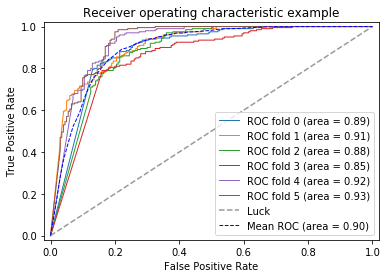

======================The terminal acc_y of NB:==========================================
0.7879166666666667
==============accurcay:
0.7683333333333333
++++++++++++++++ test set number is:400+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
1600
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]
=============the wrong num is 21
=============the wrong num is 24
=============the wrong num is 35
=============the wrong num is 106
=============the wrong num is 110
=============the wrong num is 111
=============the wrong num is 112
=============the wrong num is 113
=============the wrong num is 116
=============the wrong num is 120
=============the wrong num is 123
=============the wrong num is 124
=============the wrong num is 132
=============the wrong num is 134
=============the wrong num is 135
==

=============the wrong num is 1441
=============the wrong num is 1442
=============the wrong num is 1446
=============the wrong num is 1448
=============the wrong num is 1449
=============the wrong num is 1450
=============the wrong num is 1451
=============the wrong num is 1452
=============the wrong num is 1453
=============the wrong num is 1455
=============the wrong num is 1456
=============the wrong num is 1457
=============the wrong num is 1459
=============the wrong num is 1462
=============the wrong num is 1463
=============the wrong num is 1468
=============the wrong num is 1472
=============the wrong num is 1473
=============the wrong num is 1480
=============the wrong num is 1482
=============the wrong num is 1483
=============the wrong num is 1484
=============the wrong num is 1485
=============the wrong num is 1486
=============the wrong num is 1487
=============the wrong num is 1488
=============the wrong num is 1489
=============the wrong num is 1490
=============the wro

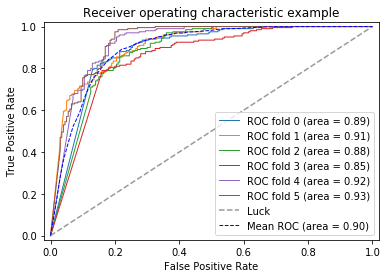

======================The terminal acc_y of NB:==========================================
0.7879166666666667
==============accurcay:
0.7775
++++++++++++++++ test set number is:500+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
1400
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]
=============the wrong num is 6
=============the wrong num is 10
=============the wrong num is 11
=============the wrong num is 12
=============the wrong num is 13
=============the wrong num is 15
=============the wrong num is 16
=============the wrong num is 18
=============the wrong num is 20
=============the wrong num is 23
=============the wrong num is 24
=============the wrong num is 32
=============the wrong num is 34
=============the wrong num is 35
=============the wrong num is 36
=============the wrong num 

========each acc_y===========--------------------
[0.8325, 0.775, 0.7975, 0.81, 0.8, 0.7125]
------------fpr, tpr-----------------
--------------------eer------------
[0.]


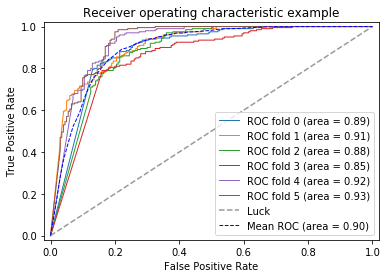

======================The terminal acc_y of NB:==========================================
0.7879166666666667
==============accurcay:
0.8007142857142857
++++++++++++++++ test set number is:600+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
1200
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]
=============the wrong num is 7
=============the wrong num is 33
=============the wrong num is 95
=============the wrong num is 97
=============the wrong num is 98
=============the wrong num is 105
=============the wrong num is 106
=============the wrong num is 107
=============the wrong num is 108
=============the wrong num is 111
=============the wrong num is 112
=============the wrong num is 113
=============the wrong num is 114
=============the wrong num is 115
=============the wrong num is 116
=====

========each acc_y===========--------------------
[0.8325, 0.775, 0.7975, 0.81, 0.8, 0.7125]
------------fpr, tpr-----------------
--------------------eer------------
[0.]


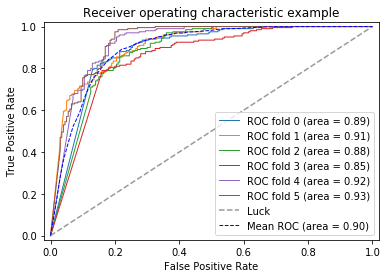

======================The terminal acc_y of NB:==========================================
0.7879166666666667
==============accurcay:
0.7858333333333334
++++++++++++++++ test set number is:700+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
1000
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]

========each acc_y===========--------------------
[0.8325, 0.775, 0.7975, 0.81, 0.8, 0.7125]
------------fpr, tpr-----------------
--------------------eer------------
[0.]


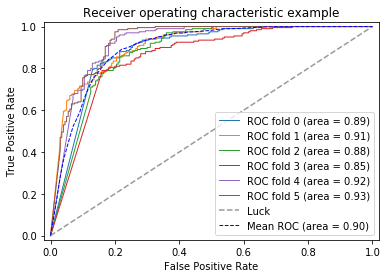

======================The terminal acc_y of NB:==========================================
0.7879166666666667
==============accurcay:
0.748
=====ccr=====
[0.7645454545454545, 0.758, 0.7683333333333333, 0.7775, 0.8007142857142857, 0.7858333333333334, 0.748]


In [56]:
if __name__ == "__main__":

	loop_num=np.array([100,1000,2000,4000,6000,8000,10000])
	acc=[]
	loop_num1=np.array([100,200,300,400,500,600,700])
	#LGBP
	for i in range(len(loop_num1)):
		print ('++++++++++++++++ test set number is:' + str(loop_num1[i])+ '+++++++++++++++++++++++')
		lgbp_asian_path = 'LGBPAsian.mat'
		lgbp_white_path = 'LGBPWhite.mat'
		trainNum = loop_num1[i]
		accurcay = forRaceNB(lgbp_asian_path,lgbp_white_path, trainNum,'LGBP','LGBP_Asian_White')
		print('==============accurcay:')
		print(accurcay)
		acc.append(accurcay)
	np.savetxt('LGBP_RACE_CCR_NB.csv', acc, delimiter = ',')  

	print('=====ccr=====') #train set 10000 stands for getting 10000 from each class to train
	print(acc)
	plt.plot(loop_num1*2,acc, 'r--*')
	plt.xlabel('Number of iris images userd for training per each class')
	plt.ylabel('Correct Classification Rate')

LDA
Linear discriminant analysis (LDA) or discriminant function analysis is a generalization of Fisher's linear discriminant, a method used in statistics, pattern recognition and machine learning to find a linear combination of features that characterizes or separates two or more classes of objects or events.

In [57]:
def LDAClassificationForIris(trainNum, _type, *dataSet):
	'This function is for LDA classification'
	print('kkkkkkkkkkkkkkkkkkkkkkkk')
	#print(dataSet[0])
	
	
	
	trainSet = np.concatenate((dataSet[0],dataSet[2]),axis=0) #lion + all human

	trainLabelOne = np.zeros((shape(dataSet[0])[0],1)) #first class label for lions
	trainLabelTwo = np.ones((shape(dataSet[2])[0],1)) #second class label for all human
	trainLabel = np.concatenate((trainLabelOne,trainLabelTwo),axis=0)

	testLabelOne = np.zeros((shape(dataSet[1])[0],1))
	testLabelTwo = np.ones((shape(dataSet[3])[0],1))
	testLabel = np.concatenate((testLabelOne, testLabelTwo),axis=0)
	#print (shape(testLabel)) #417x1
	testSetOne = np.array(dataSet[1])
	testSetTwo = np.array(dataSet[3])
	testSet = np.concatenate((testSetOne,testSetTwo),axis=0) #testSet : 417x2360
#	print ('++++++++++++++++++++')
#	print (shape(trainSet))
#	print (shape(trainLabel))
	print ('------------------------------')
	#print (trainSet.shape)
	#print (trainLabel.shape)
	clf = LDA()
	clf.fit(trainSet, trainLabel)
	LDA(n_components=None, priors=None, shrinkage=None, solver='svd', store_covariance=False, tol=0.0001)
#	SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,\
#		decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',\
#		max_iter=-1, probability=False, random_state=None, shrinking=True,\
#		tol=0.001, verbose=False)
	
	print ('=========================The classification results are :=======================')
	classificationResult = clf.predict(testSet)
	#store the classification result: known class,unknown class
	#print(testLabel.shape), print(classificationResult.shape)
	#classificationResult.shape=(testLabel.shape[0],1)
	#print(testLabel.shape), print(classificationResult.shape)
	origin_class = testLabel
	clf_class = classificationResult
	clf_class.shape = (testLabel.shape[0],1)
	all_class = np.concatenate((origin_class, clf_class), axis=1)
	print('---------------number of test set--------------')
	print(all_class.shape[0])
	#label_name = _type + '_SVM_ORIGIN_CLF_LABEL.csv'
	#np.savetxt(label_name, all_class, delimiter = ',')  
	print ('=========the classfiy results==============') #1x417; 
	print (classificationResult)

	#save the classificationResult: the first column is true label, the second is classification label
	#testLabel.T: transposition转置; testLabel为1x417,classificationResult为417x1,dimensionality is different, so need to convert to the same维数不同,需要化为相同
	
	trueLabelAndClassifyLabel = np.concatenate((testLabel,classificationResult),axis=0)
	trueLabelAndClassifyLabel = trueLabelAndClassifyLabel.T
	#print (trueLabelAndClassifyLabel.shape)
	count = 0
	wrong_num = 0
	for i in range(1,shape(classificationResult)[0]):
		if testLabel[i] == classificationResult[i]:
			count = count + 1
		else:
			wrong_num += 1
			print('=============the wrong num is ' + str(i))
	print('Total number of inaccurate images is' + str(wrong_num) )
	accurcay = count/classificationResult.shape[0]
	print ('======================The accurcay of LDA:==========================================')
	print (accurcay)

	print ('======================The scores:===============================================')
	weight = [0.0001 for i in range(classificationResult.shape[0])]
	for x in range(1,classificationResult.shape[0]):
		weight[x-1] = random.uniform(0,1)
	print(clf.score(testSet, testLabel,weight))

	#print ('======================The Estimate probability=================================')
	#estimate_pro = clf.predict_proba(testSet) # for get ROC
	#print (estimate_pro)
	#print (estimate_pro.shape)

	print ('======================Predicit confidence scores for samples:============================')
	predicit_confidence = clf.decision_function(testSet)
	print (predicit_confidence)
	#print (predicit_confidence.shape)
	#call ROC
	#yLabel = np.concatenate((trainLabel,testLabel),axis=0)
	#getROCCurve(testLabel, predicit_confidence)
	#cross validation
	X = np.concatenate((trainSet,testSet),axis=0)
	Y = np.concatenate((trainLabel,testLabel),axis=0)
	YY = Y
	YY.shape = (YY.shape[0],)
	#kFold = cross_validation.KFold(len(X),6, shuffle=True)
	kFold = StratifiedKFold(YY, n_folds=6)
	
	acc_y = getROCCurve(clf,X, Y, kFold, _type)
	print ('======================The terminal acc_y of LDA:==========================================')
	print(acc_y)
	#return acc_y #for CCR
	return accurcay

In [58]:
def forRaceLDA(asian_path,  white_path,train_num, _type, file_type):
	
	(AsianTrainSet,AsianTestSet) = getTrainAndTestSetRace(asian_path,train_num, _type+'AsianTrain')
	(WhiteTrainSet,WhiteTestSet) = getTrainAndTestSetRace(white_path,train_num, _type+'WhiteTrain')

	acc_y = LDAClassificationForIris(train_num,file_type, AsianTrainSet,AsianTestSet, \
		WhiteTrainSet, WhiteTestSet)
	return acc_y

++++++++++++++++ test set number is:100+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


=========================The classification results are :=======================
---------------number of test set--------------
2200
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]
=============the wrong num is 84
=============the wrong num is 128
=============the wrong num is 132
=============the wrong num is 175
=============the wrong num is 179
=============the wrong num is 181
=============the wrong num is 184
=============the wrong num is 281
=============the wrong num is 313
=============the wrong num is 321
=============the wrong num is 335
=============the wrong num is 643
=============the wrong num is 684
=============the wrong num is 743
=============the wrong num is 746
=============the wrong num is 813
=============the wrong num is 814
=============the wrong num is 944
=============the wrong num is 1003
=============the wrong num is 1005
=============the wrong num is 1156
=============the wrong num is 1198
=============the wrong num is

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:510: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


========each acc_y===========--------------------
[0.8925, 0.8825, 0.8925, 0.8675, 0.8675, 0.91]
------------fpr, tpr-----------------
--------------------eer------------
[0.]


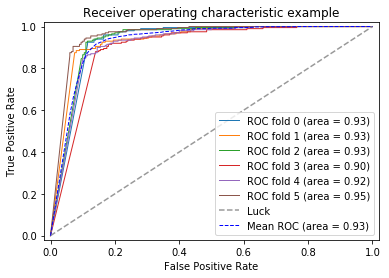

======================The terminal acc_y of LDA:==========================================
0.8854166666666666
==============accurcay:
0.9031818181818182
++++++++++++++++ test set number is:200+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
2000
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]
=============the wrong num is 81
=============the wrong num is 130
=============the wrong num is 213
=============the wrong num is 221
=============the wrong num is 324
=============the wrong num is 412
=============the wrong num is 451
=============the wrong num is 584
=============the wrong num is 707
=============the wrong num is 713
=============the wrong num is 714
=============the wrong num is 723
=============the wrong num is 844
=============the wrong num is 879
=============the wrong num is 100

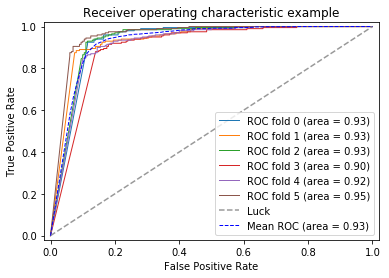

======================The terminal acc_y of LDA:==========================================
0.8854166666666666
==============accurcay:
0.9465
++++++++++++++++ test set number is:300+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
1800
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]
=============the wrong num is 30
=============the wrong num is 34
=============the wrong num is 89
=============the wrong num is 110
=============the wrong num is 112
=============the wrong num is 113
=============the wrong num is 121
=============the wrong num is 316
=============the wrong num is 351
=============the wrong num is 772
=============the wrong num is 779
=============the wrong num is 816
=============the wrong num is 901
=============the wrong num is 959
=============the wrong num is 960
=============

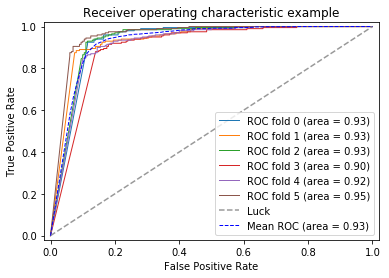

======================The terminal acc_y of LDA:==========================================
0.8854166666666666
==============accurcay:
0.9561111111111111
++++++++++++++++ test set number is:400+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
1600
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]
=============the wrong num is 10
=============the wrong num is 12
=============the wrong num is 13
=============the wrong num is 21
=============the wrong num is 200
=============the wrong num is 215
=============the wrong num is 216
=============the wrong num is 217
=============the wrong num is 220
=============the wrong num is 389
=============the wrong num is 490
=============the wrong num is 509
=============the wrong num is 513
=============the wrong num is 514
=============the wrong num is 530
==

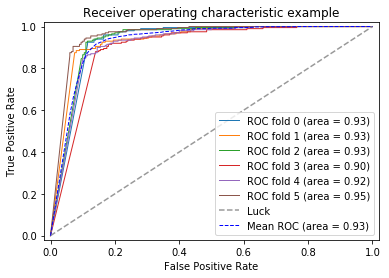

======================The terminal acc_y of LDA:==========================================
0.8854166666666666
==============accurcay:
0.963125
++++++++++++++++ test set number is:500+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
1400
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
=============the wrong num is 13
=============the wrong num is 81
=============the wrong num is 112
=============the wrong num is 115
=============the wrong num is 118
=============the wrong num is 120
=============the wrong num is 243
=============the wrong num is 365
=============the wrong num is 390
=============the wrong num is 407
=============the wrong num is 408
=============the wrong num is 409
=============the wrong num is 414
=============the wrong num is 425
=============the wrong num is 469
==========

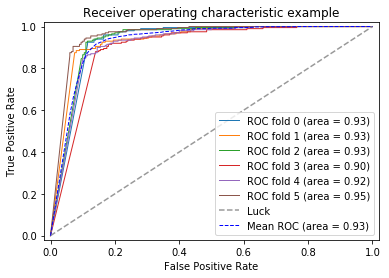

======================The terminal acc_y of LDA:==========================================
0.8854166666666666
==============accurcay:
0.9857142857142858
++++++++++++++++ test set number is:600+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
1200
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
=============the wrong num is 12
=============the wrong num is 14
=============the wrong num is 16
=============the wrong num is 25
=============the wrong num is 99
=============the wrong num is 120
=============the wrong num is 132
=============the wrong num is 143
=============the wrong num is 189
=============the wrong num is 291
=============the wrong num is 307
=============the wrong num is 309
=============the wrong num is 310
=============the wrong num is 314
=============the wrong num is 325
===

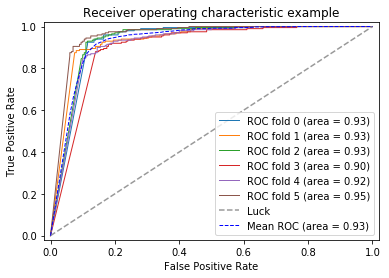

======================The terminal acc_y of LDA:==========================================
0.8854166666666666
==============accurcay:
0.9775
++++++++++++++++ test set number is:700+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
1000
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.

========each acc_y===========--------------------
[0.8925, 0.8825, 0.8925, 0.8675, 0.8675, 0.91]
------------fpr, tpr-----------------
--------------------eer------------
[0.]


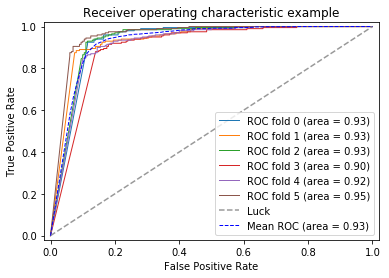

======================The terminal acc_y of LDA:==========================================
0.8854166666666666
==============accurcay:
0.977
=====ccr=====
[0.9031818181818182, 0.9465, 0.9561111111111111, 0.963125, 0.9857142857142858, 0.9775, 0.977]


In [59]:
if __name__ == "__main__":

	loop_num=np.array([100,1000,2000,4000,6000,8000,10000])
	acc=[]
	loop_num1=np.array([100,200,300,400,500,600,700])
	#LGBP
	for i in range(len(loop_num1)):
		print ('++++++++++++++++ test set number is:' + str(loop_num1[i])+ '+++++++++++++++++++++++')
		lgbp_asian_path = 'LGBPAsian.mat'
		lgbp_white_path = 'LGBPWhite.mat'
		trainNum = loop_num1[i]
		accurcay = forRaceLDA(lgbp_asian_path,lgbp_white_path, trainNum,'LGBP','LGBP_Asian_White')
		print('==============accurcay:')
		print(accurcay)
		acc.append(accurcay)
	np.savetxt('LGBP_RACE_CCR_LDA.csv', acc, delimiter = ',')  

	print('=====ccr=====') #train set 10000 stands for getting 10000 from each class to train
	print(acc)
	plt.plot(loop_num1*2,acc, 'r--*')
	plt.xlabel('Number of iris images userd for training per each class')
	plt.ylabel('Correct Classification Rate')

SVM
In machine learning, support vector machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. [5] For this research the algorithms used is linear SVM.

In [60]:
def SVMClassificationForIris(trainNum, _type, *dataSet):
	'This function is for SVM classification'
	print('kkkkkkkkkkkkkkkkkkkkkkkk')
	#print(dataSet[0])
	
	
	
	trainSet = np.concatenate((dataSet[0],dataSet[2]),axis=0) #lion + all human

	trainLabelOne = np.zeros((shape(dataSet[0])[0],1)) #first class label for lions
	trainLabelTwo = np.ones((shape(dataSet[2])[0],1)) #second class label for all human
	trainLabel = np.concatenate((trainLabelOne,trainLabelTwo),axis=0)

	testLabelOne = np.zeros((shape(dataSet[1])[0],1))
	testLabelTwo = np.ones((shape(dataSet[3])[0],1))
	testLabel = np.concatenate((testLabelOne, testLabelTwo),axis=0)
	#print (shape(testLabel)) #417x1
	testSetOne = np.array(dataSet[1])
	testSetTwo = np.array(dataSet[3])
	testSet = np.concatenate((testSetOne,testSetTwo),axis=0) #testSet : 417x2360
#	print ('++++++++++++++++++++')
#	print (shape(trainSet))
#	print (shape(trainLabel))
	print ('------------------------------')
	#print (trainSet.shape)
	#print (trainLabel.shape)
	random_state = np.random.RandomState(0)

	clf = SVC(kernel='linear',probability=True,random_state=random_state)
	clf.fit(trainSet, trainLabel)
#	SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,\
#		decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',\
#		max_iter=-1, probability=False, random_state=None, shrinking=True,\
#		tol=0.001, verbose=False)
	
	print ('=========================The classification results are :=======================')
	classificationResult = clf.predict(testSet)
	#store the classification result: known class,unknown class
	#print(testLabel.shape), print(classificationResult.shape)
	#classificationResult.shape=(testLabel.shape[0],1)
	#print(testLabel.shape), print(classificationResult.shape)
	origin_class = testLabel
	clf_class = classificationResult
	clf_class.shape = (testLabel.shape[0],1)
	all_class = np.concatenate((origin_class, clf_class), axis=1)
	print('---------------number of test set--------------')
	print(all_class.shape[0])
	#label_name = _type + '_SVM_ORIGIN_CLF_LABEL.csv'
	#np.savetxt(label_name, all_class, delimiter = ',')  
	print ('=========the classfiy results==============') #1x417; 
	print (classificationResult)

	#save the classificationResult: the first column is true label, the second is classification label
	#testLabel.T: transposition转置; testLabel为1x417,classificationResult为417x1,dimensionality is different, so need to convert to the same维数不同,需要化为相同
	
	trueLabelAndClassifyLabel = np.concatenate((testLabel,classificationResult),axis=0)
	trueLabelAndClassifyLabel = trueLabelAndClassifyLabel.T
	#print (trueLabelAndClassifyLabel.shape)
	count = 0
	wrong_num = 0
	for i in range(1,shape(classificationResult)[0]):
		if testLabel[i] == classificationResult[i]:
			count = count + 1
		else:
			wrong_num += 1
			print('=============the wrong num is ' + str(i))
	print('Total number of inaccurate images is' + str(wrong_num) )
	accurcay = count/classificationResult.shape[0]
	print ('======================The accurcay of LDA:==========================================')
	print (accurcay)

	print ('======================The scores:===============================================')
	weight = [0.0001 for i in range(classificationResult.shape[0])]
	for x in range(1,classificationResult.shape[0]):
		weight[x-1] = random.uniform(0,1)
	print(clf.score(testSet, testLabel,weight))

	#print ('======================The Estimate probability=================================')
	#estimate_pro = clf.predict_proba(testSet) # for get ROC
	#print (estimate_pro)
	#print (estimate_pro.shape)

	print ('======================Predicit confidence scores for samples:============================')
	predicit_confidence = clf.decision_function(testSet)
	print (predicit_confidence)
	#print (predicit_confidence.shape)
	#call ROC
	#yLabel = np.concatenate((trainLabel,testLabel),axis=0)
	#getROCCurve(testLabel, predicit_confidence)
	#cross validation
	X = np.concatenate((trainSet,testSet),axis=0)
	Y = np.concatenate((trainLabel,testLabel),axis=0)
	YY = Y
	YY.shape = (YY.shape[0],)
	#kFold = cross_validation.KFold(len(X),6, shuffle=True)
	kFold = StratifiedKFold(YY, n_folds=6)
	
	acc_y = getROCCurve(clf,X, Y, kFold, _type)
	print ('======================The terminal acc_y of SVM:==========================================')
	print(acc_y)
	#return acc_y #for CCR
	return accurcay

In [61]:
def forRaceSVM(asian_path,  white_path,train_num, _type, file_type):
	
	(AsianTrainSet,AsianTestSet) = getTrainAndTestSetRace(asian_path,train_num, _type+'AsianTrain')
	(WhiteTrainSet,WhiteTestSet) = getTrainAndTestSetRace(white_path,train_num, _type+'WhiteTrain')

	acc_y = SVMClassificationForIris(train_num,file_type, AsianTrainSet,AsianTestSet, \
		WhiteTrainSet, WhiteTestSet)
	return acc_y


++++++++++++++++ test set number is:100+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=========================The classification results are :=======================
---------------number of test set--------------
2200
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]
=============the wrong num is 53
=============the wrong num is 80
=============the wrong num is 84
=============the wrong num is 86
=============the wrong num is 175
=============the wrong num is 179
=============the wrong num is 321
=============the wrong num is 335
=============the wrong num is 441
=============the wrong num is 514
=============the wrong num is 595
=============the wrong num is 636
=============the wrong num is 637
=============the wrong num is 642
=============the wrong num is 643
=============the wrong num is 682
=============the wrong num is 683
=============the wrong num is 688
=============the wrong num is 689
=============the wrong num is 814
=============the wrong num is 924
=============the wrong num is 1162
=============the wrong num is 1207


0.875199065718385
======================Predicit confidence scores for samples:============================
[-1.4332627  -1.3762946  -1.1735241  ...  0.24903617  0.38555808
 -0.48467137]
====================================get ROC ====================
========each acc_y===========--------------------
[0.99, 0.995, 0.9775, 0.985, 0.9975, 0.995]
------------fpr, tpr-----------------
--------------------eer------------
[0.]


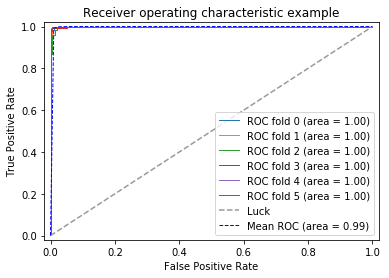

======================The terminal acc_y of SVM:==========================================
0.9900000000000001
==============accurcay:
0.8804545454545455
++++++++++++++++ test set number is:200+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
2000
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]
=============the wrong num is 75
=============the wrong num is 79
=============the wrong num is 221
=============the wrong num is 235
=============the wrong num is 324
=============the wrong num is 341
=============the wrong num is 414
=============the wrong num is 714
=============the wrong num is 824
=============the wrong num is 950
=============the wrong num is 1006
=============the wrong num is 1007
=============the wrong num is 1008
=============the wrong num is 1009
=============the wrong num is 

0.8815632060033011
======================Predicit confidence scores for samples:============================
[-1.5081041  -2.08934906 -2.04382949 ...  0.2572024   0.45095255
 -0.49589845]
====================================get ROC ====================
========each acc_y===========--------------------
[0.99, 0.995, 0.9775, 0.985, 0.9975, 0.995]
------------fpr, tpr-----------------
--------------------eer------------
[0.]


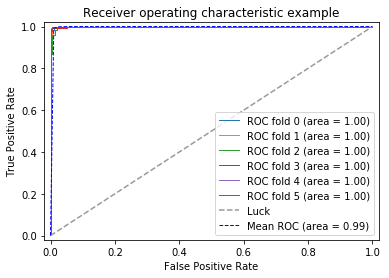

======================The terminal acc_y of SVM:==========================================
0.9900000000000001
==============accurcay:
0.8775
++++++++++++++++ test set number is:300+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
1800
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]
=============the wrong num is 121
=============the wrong num is 135
=============the wrong num is 250
=============the wrong num is 314
=============the wrong num is 316
=============the wrong num is 537
=============the wrong num is 614
=============the wrong num is 676
=============the wrong num is 850
=============the wrong num is 901
=============the wrong num is 911
=============the wrong num is 913
=============the wrong num is 914
=============the wrong num is 930
=============the wrong num is 959
==========

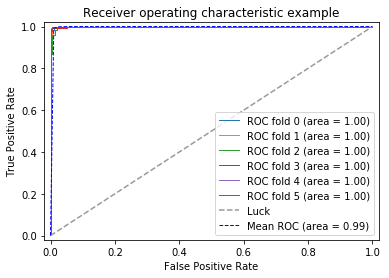

======================The terminal acc_y of SVM:==========================================
0.9900000000000001
==============accurcay:
0.9166666666666666
++++++++++++++++ test set number is:400+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
1600
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
=============the wrong num is 21
=============the wrong num is 35
=============the wrong num is 124
=============the wrong num is 207
=============the wrong num is 214
=============the wrong num is 215
=============the wrong num is 343
=============the wrong num is 514
=============the wrong num is 705
=============the wrong num is 750
=============the wrong num is 805
=============the wrong num is 809
=============the wrong num is 814
=============the wrong num is 819
=============the wrong num is 822


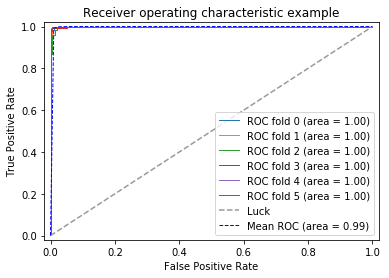

======================The terminal acc_y of SVM:==========================================
0.9900000000000001
==============accurcay:
0.954375
++++++++++++++++ test set number is:500+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
1400
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
=============the wrong num is 24
=============the wrong num is 108
=============the wrong num is 114
=============the wrong num is 115
=============the wrong num is 116
=============the wrong num is 242
=============the wrong num is 243
=============the wrong num is 283
=============the wrong num is 430
=============the wrong num is 470
Total number of inaccurate images is10
======================The accurcay of LDA:==========================================
0.9921428571428571
======================The scores:===

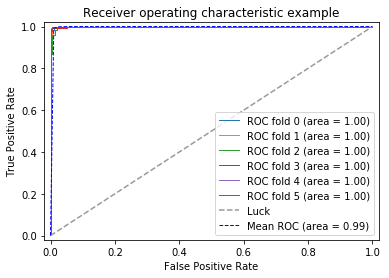

======================The terminal acc_y of SVM:==========================================
0.9900000000000001
==============accurcay:
0.9921428571428571
++++++++++++++++ test set number is:600+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
1200
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
=============the wrong num is 8
=============the wrong num is 14
=============the wrong num is 15
=============the wrong num is 16
=============the wrong num is 142
=============the wrong num is 143
=============the wrong num is 168
=============the wrong num is 183
=============the wrong num is 330
=============the wrong num is 370
Total number of inaccurate images is10
======================The accurcay of LDA:==========================================
0.9908333333333333
======================The scor

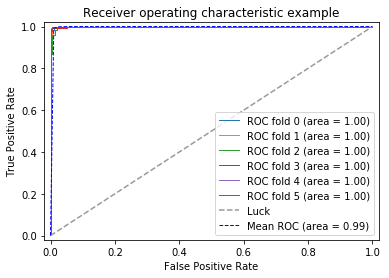

======================The terminal acc_y of SVM:==========================================
0.9900000000000001
==============accurcay:
0.9908333333333333
++++++++++++++++ test set number is:700+++++++++++++++++++++++
kkkkkkkkkkkkkkkkkkkkkkkk
------------------------------
=========================The classification results are :=======================
---------------number of test set--------------
1000
=========the classfiy results==============
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

========each acc_y===========--------------------
[0.99, 0.995, 0.9775, 0.985, 0.9975, 0.995]
------------fpr, tpr-----------------
--------------------eer------------
[0.]


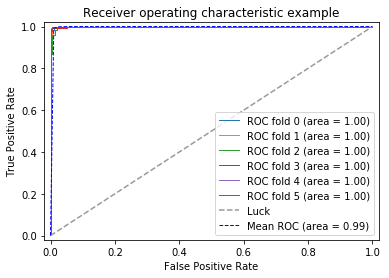

======================The terminal acc_y of SVM:==========================================
0.9900000000000001
==============accurcay:
0.994
=====ccr=====
[0.8804545454545455, 0.8775, 0.9166666666666666, 0.954375, 0.9921428571428571, 0.9908333333333333, 0.994]


In [62]:
if __name__ == "__main__":

	loop_num=np.array([100,1000,2000,4000,6000,8000,10000])
	acc=[]
	loop_num1=np.array([100,200,300,400,500,600,700])
	#LGBP
	for i in range(len(loop_num1)):
		print ('++++++++++++++++ test set number is:' + str(loop_num1[i])+ '+++++++++++++++++++++++')
		lgbp_asian_path = 'LGBPAsian.mat'
		lgbp_white_path = 'LGBPWhite.mat'
		trainNum = loop_num1[i]
		accurcay = forRaceSVM(lgbp_asian_path,lgbp_white_path, trainNum,'LGBP','LGBP_Asian_White')
		print('==============accurcay:')
		print(accurcay)
		acc.append(accurcay)
	np.savetxt('LGBP_RACE_CCR_SVM.csv', acc, delimiter = ',')  

	print('=====ccr=====') #train set 10000 stands for getting 10000 from each class to train
	print(acc)
	plt.plot(loop_num1*2,acc, 'r--*')
	plt.xlabel('Number of iris images userd for training per each class')
	plt.ylabel('Correct Classification Rate')

To get the CCR curve of Race classification from LGBP feature extraction.

In [63]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [64]:
knn =pd.read_csv('LGBP_RACE_CCR_KNN.csv') 
lda =pd.read_csv('LGBP_RACE_CCR_LDA.csv') 
nb =pd.read_csv('LGBP_RACE_CCR_NB.csv') 
svm =pd.read_csv('LGBP_RACE_CCR_SVM.csv') 
irisnum=pd.read_csv('LGBP_RACE_CCR_IRISNUM.csv')

In [65]:
plt.title('accuracy Analysis')

Text(0.5,1,'accuracy Analysis')

In [66]:
plt.plot(irisnum['iris_num'], knn['acc_knn'], color='green', label='knn accuracy')
plt.plot(irisnum['iris_num'], lda['acc_lda'], color='red', label='lda accuracy')
plt.plot(irisnum['iris_num'], nb['acc_nb'], color='skyblue', label='nb accuracy')
plt.plot(irisnum['iris_num'], svm['acc_svm'], color='black', label='svm accuracy')

In [67]:
plt.xticks(rotation=30)

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text xticklabel objects>)

In [68]:
plt.legend()
plt.xlabel('numbers of iris images')
plt.ylabel('classficiation rate')

Text(0,0.5,'classficiation rate')

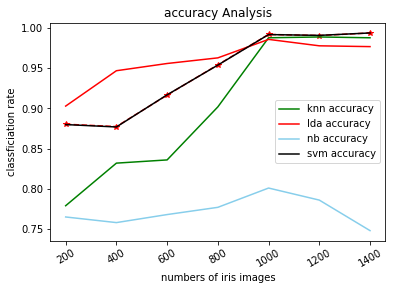

In [69]:
plt.show()

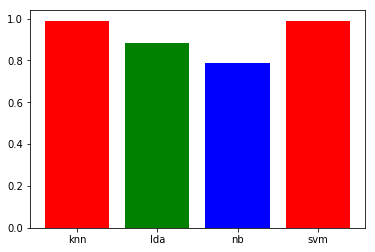

In [70]:
model_list = ['knn','lda','nb','svm']
mean_accuracy_list = [ 0.9895833333333334,0.8854166666666666,0.7879166666666667,0.9900000000000001]
plt.bar(range(len(mean_accuracy_list)), mean_accuracy_list,color='rgb',tick_label=model_list)
plt.show()